# Exploring tabular data with Pandas

NumPy provides a lot of the functionality and tools you need to work with numbers, such as arrays of numeric values. However, when you start to deal with two-dimensional tables of data, the **Pandas** package offers a more convenient structure to work with: the **DataFrame**.

In [1]:
import numpy as np
import pandas as pd

# Loading data

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')
df_students

--2023-08-12 01:29:47--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.9'

     0K                                                       100% 50.3M=0s

2023-08-12 01:29:47 (50.3 MB/s) - 'grades.csv.9' saved [322/322]



,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [3]:
df_students.describe()

,StudyHours,Grade
count,23.000000,22.000000
mean,10.413043,49.181818
std,3.447338,21.737912
min,1.000000,3.000000
25%,8.750000,36.250000
50%,10.000000,49.500000
75%,12.250000,62.750000
max,16.000000,97.000000


## Dealing with missing Data 

In [4]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [5]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [6]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [7]:
df_students.StudyHours= df_students.StudyHours.fillna(df_students.StudyHours.mean())

In [8]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.000000,NaN
23,Ted,10.413043,NaN


In [9]:
df_students=df_students.dropna(axis=0,how='any')

In [10]:
df_students.Grade

0     50.0
1     50.0
2     47.0
3     97.0
4     49.0
5      3.0
6     53.0
7     42.0
8     26.0
9     74.0
10    82.0
11    62.0
12    37.0
13    15.0
14    70.0
15    27.0
16    36.0
17    35.0
18    48.0
19    52.0
20    63.0
21    64.0
Name: Grade, dtype: float64

## Explore Data in DataFrames 

In [11]:
mean_study=df_students['StudyHours'].mean()
mean_study

10.522727272727273

In [12]:
mean_grade=df_students['Grade'].mean()
mean_grade

49.18181818181818

In [13]:
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


In [14]:
print('Average weekly study hours:'+ str(mean_study)+ '\nAverage grade:'+ str(mean_grade))

Average weekly study hours:10.522727272727273
Average grade:49.18181818181818


In [15]:
passes=pd.Series(df_students.Grade>= 60)
df_students=pd.concat([df_students,passes.rename('Pass')],axis=1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [22]:
print(df_students.groupby(df_students['Pass']).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


In [24]:
print(df_students.groupby(df_students.Pass)['StudyHours','Grade'].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\3173753561.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours','Grade'].mean())


In [26]:
df_students=df_students.sort_values('Grade',ascending=False)
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


## Finding and Filtering Data

In [42]:
df_students.iloc[1:2]

,Name,StudyHours,Grade,Pass
10,Francesca,15.5,82.0,True


In [32]:
df_students.loc[df_students['Name']=='Jakeem']

,Name,StudyHours,Grade,Pass
15,Jakeem,8.0,27.0,False


In [46]:
df_students.loc[1:15]

,Name,StudyHours,Grade,Pass
1,Joann,11.50,50.0,False
0,Dan,10.00,50.0,False
4,Ethan,9.25,49.0,False
18,Anila,10.00,48.0,False
2,Pedro,9.00,47.0,False
7,Jimmie,9.00,42.0,False
12,Naiyana,9.00,37.0,False
16,Helena,9.00,36.0,False
17,Ismat,6.00,35.0,False
15,Jakeem,8.00,27.0,False


In [47]:
df_students.iloc[1:15]

,Name,StudyHours,Grade,Pass
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False
0,Dan,10.00,50.0,False


In [68]:
df_students.iloc[0:4,0:3]

,Name,StudyHours,Grade
3,Rosie,16.0,97.0
10,Francesca,15.5,82.0
9,Giovanni,14.5,74.0
14,Jenny,15.5,70.0


In [57]:
## error if we do slicing with loc in both row and columns
#df_students.loc[0:3,0:3]

In [63]:
df_students.iloc[3]

Name          Jenny
StudyHours     15.5
Grade          70.0
Pass           True
Name: 14, dtype: object

In [76]:
df_students.iloc[1,1]

15.5

In [78]:
df_students.loc[1] # loc ma hum sirf index ko hi approach kar sakte hai not columns

Name          Joann
StudyHours     11.5
Grade          50.0
Pass          False
Name: 1, dtype: object

# Visualizing Data with MatplotLib

In [80]:
from matplotlib import pyplot as plt

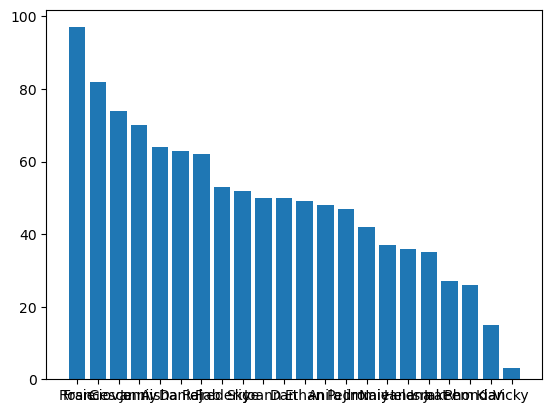

In [82]:
plt.bar(x=df_students.Name,height=df_students.Grade)
plt.show()

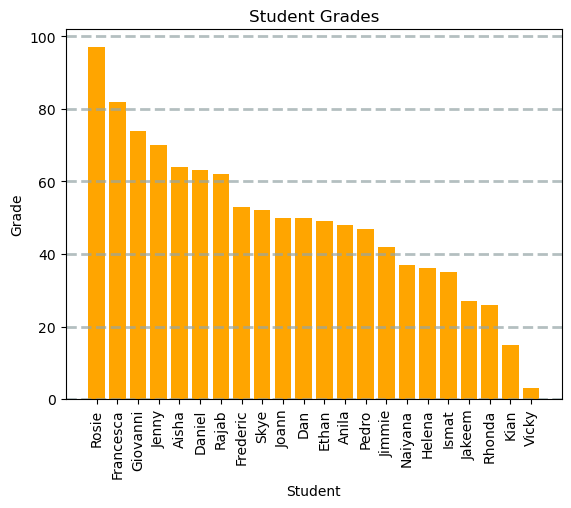

In [83]:
plt.bar(x=df_students.Name,height=df_students.Grade,color='orange')


plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()


A plot is technically contained within a Figure. In the previous examples, the figure was created implicitly for you, but you can create it explicitly. For example, the following code creates a figure with a specific size.

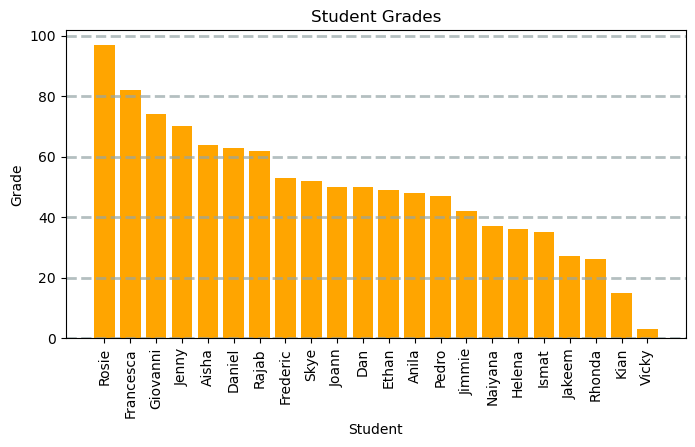

In [85]:
fig = plt.figure(figsize=(8,4))

plt.bar(x=df_students.Name,height=df_students.Grade,color='orange')

plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

A figure can contain multiple subplots, each on its own axis.

For example, the following code creates a figure with two subplots: one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\3868497734.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name,rotation=90)
C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\3868497734.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


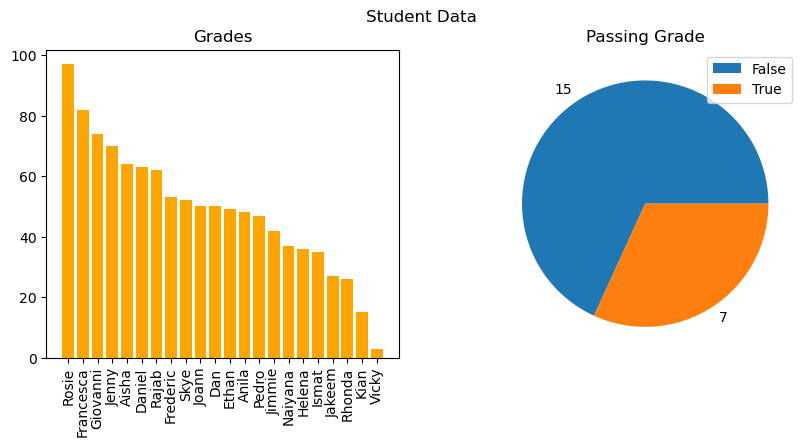

In [92]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax=plt.subplots(1,2,figsize=(10,4))

ax[0].bar(x=df_students.Name,height=df_students.Grade,color='orange')
ax[0].set_title("Grades")
ax[0].set_xticklabels(df_students.Name,rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts=df_students['Pass'].value_counts()
ax[1].pie(pass_counts,labels=pass_counts)
ax[1].set_title("Passing Grade")
ax[1].legend(pass_counts.keys().tolist())

fig.suptitle("Student Data")
fig.show()


Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data as shown in the following example, which plots a bar chart of study hours.

<Axes: xlabel='Name'>

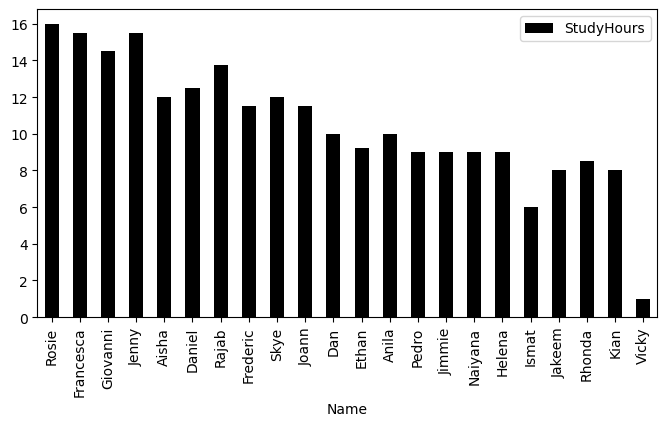

In [94]:
df_students.plot.bar(x='Name',y='StudyHours',color='black',figsize=(8,4))

# Getting started with statistics analysis

C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\1451508949.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


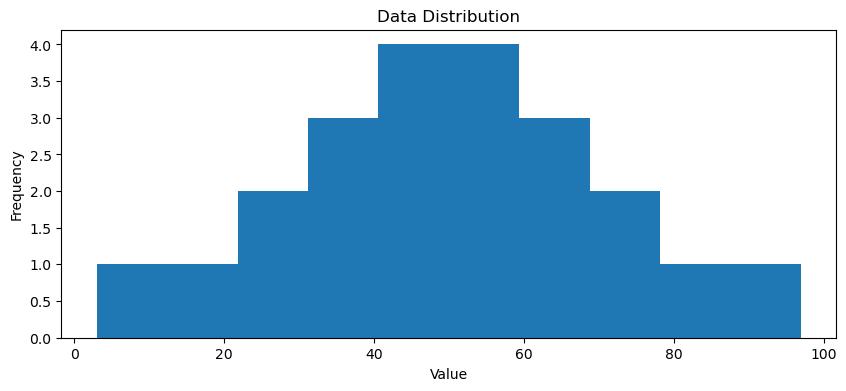

In [96]:
var_data=df_students.Grade

fig =plt.figure(figsize=(10,4))

plt.hist(var_data)
plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig.show()

# Measure of central tendency

To understand the distribution better, we can examine so-called measures of central tendency, which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this analysis is to try to find a "typical" value. Common ways to define the middle of the data include:

The mean: A simple average based on adding together all of the values in the sample set and then dividing the total by the number of samples.
The median: The value in the middle of the range of all of the sample values.
The mode: The most commonly occurring value in the sample set*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\2066630470.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


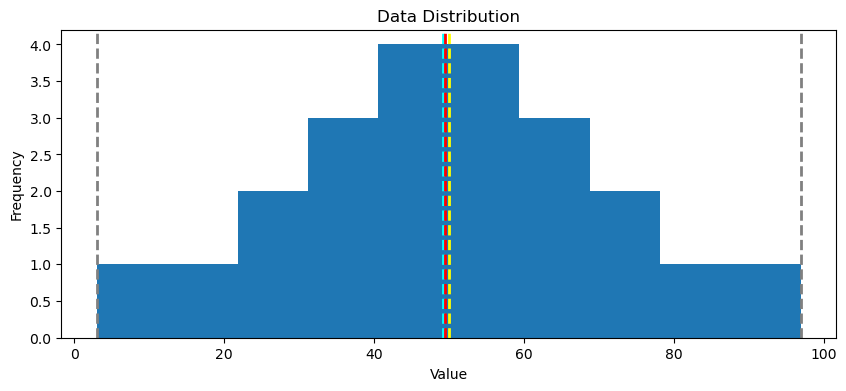

In [97]:
var=df_students['Grade']

min_val=var.min()
max_val=var.max()
mean_val=var.mean()
med_val=var.median()
mod_val=var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))
fig=plt.figure(figsize=(10,4))
plt.hist(var)

#Add lines to the statistics
plt.axvline(x=min_val,color='gray',linestyle='dashed',linewidth=2)
plt.axvline(x=mean_val,color='cyan',linestyle='dashed',linewidth=2)
plt.axvline(x=med_val,color='red',linestyle='dashed',linewidth=2)
plt.axvline(x=mod_val,color='yellow',linestyle='dashed',linewidth=2)
plt.axvline(x=max_val,color='gray',linestyle='dashed',linewidth=2)

plt.title("Data Distribution")
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()



Another way to visualize the distribution of a variable is to use a box plot (sometimes called a box-and-whiskers plot). Let's create one for the grade data.

C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\662593177.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


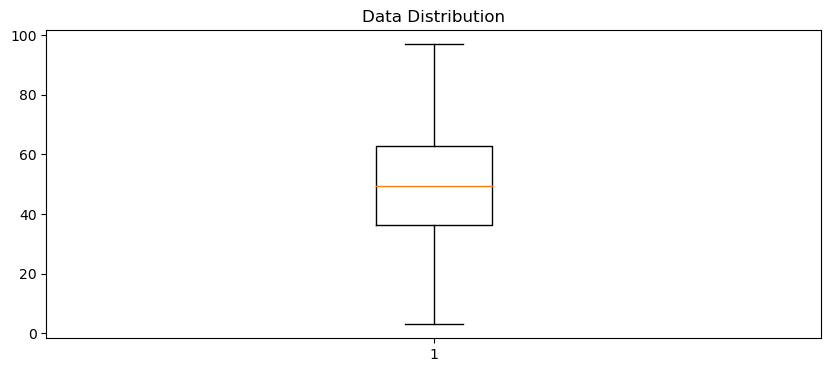

In [98]:
var=df_students.Grade

fig=plt.figure(figsize=(10,4))
plt.boxplot(var)

plt.title('Data Distribution')
fig.show()


Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\2635274478.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


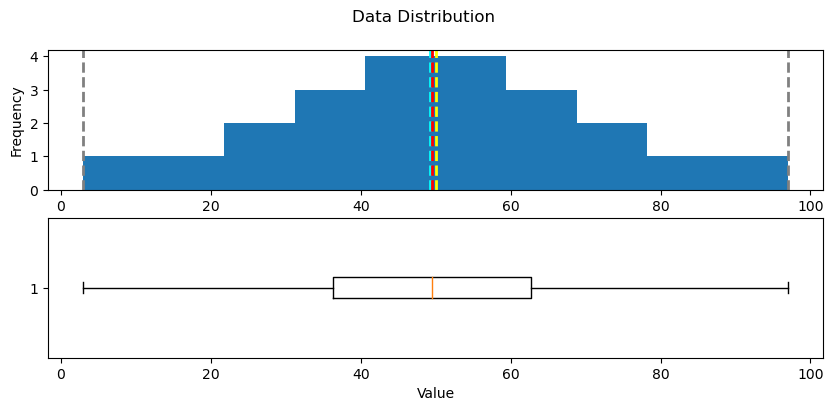

In [105]:
    def show_distribution(var_data):
        from matplotlib import pyplot as plt
        # Get statistics
        min_val=var_data.min()
        max_val=var_data.max()
        mean_val=var_data.mean()
        med_val=var_data.median()
        mod_val=var_data.mode()[0]
        print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))
        fig, ax=plt.subplots(2,1,figsize=(10,4))
        #plot histogram
        ax[0].hist(var_data)
        ax[0].set_ylabel('Frequency')
    
    
        #Add lines to the statistics
        ax[0].axvline(x=min_val,color='gray',linestyle='dashed',linewidth=2)
        ax[0].axvline(x=mean_val,color='cyan',linestyle='dashed',linewidth=2)
        ax[0].axvline(x=med_val,color='red',linestyle='dashed',linewidth=2)
        ax[0].axvline(x=mod_val,color='yellow',linestyle='dashed',linewidth=2)
        ax[0].axvline(x=max_val,color='gray',linestyle='dashed',linewidth=2)
    
        #plot boxplot
        ax[1].boxplot(var_data,vert=False)
        ax[1].set_xlabel('Value')

        #add title to figure
        fig.suptitle("Data Distribution")

        #display
        fig.show()
    
    col=df_students.Grade
    
    show_distribution(col)
    
    
    
    

All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking samples of data and using probability functions to extrapolate information about the full population of data.

What does this mean? Samples refer to the data we have on hand, such as information about these 22 students' study habits and grades. The population refers to all possible data we could collect, such as every student's grades and study habits across every educational institution throughout the history of time. Usually, we're interested in the population, but it's simply not practical to collect all of that data. Instead, we need to try estimate what the population is like from the small amount of data (samples) that we have.

If we have enough samples, we can calculate something called a probability density function, which estimates the distribution of grades for the full population.

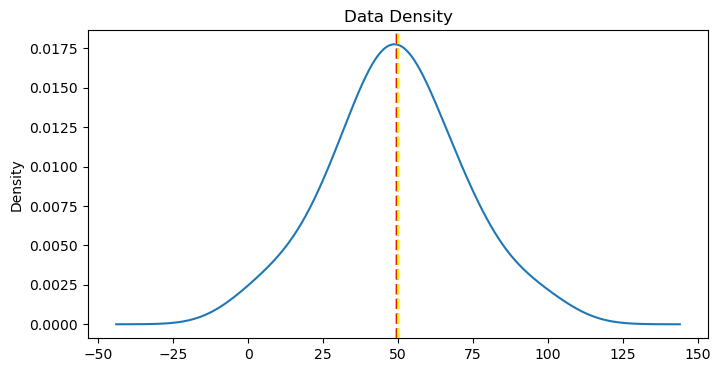

In [106]:
    def show_density(var_data):
        from matplotlib import pyplot as plt
        fig=plt.figure(figsize=(8,4))
        
        var_data.plot.density()
        
        plt.title('Data Density')
        plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
        plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
        plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
        
        plt.show()
        
    col=df_students['Grade']
    show_density(col)

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\2635274478.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


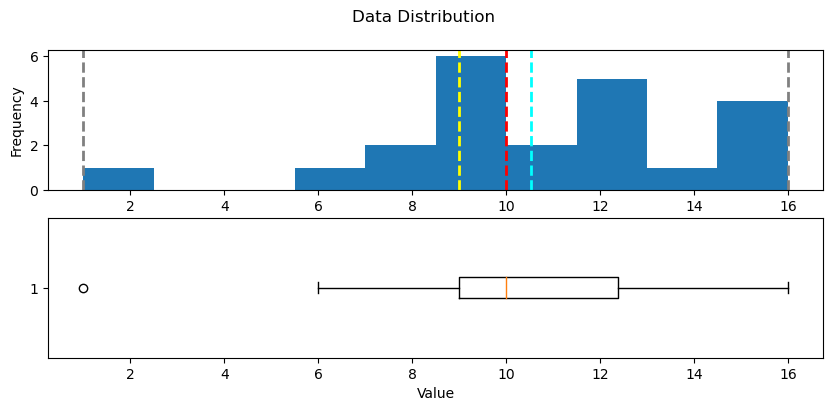

In [107]:
col=df_students['StudyHours']
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier: a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\2635274478.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


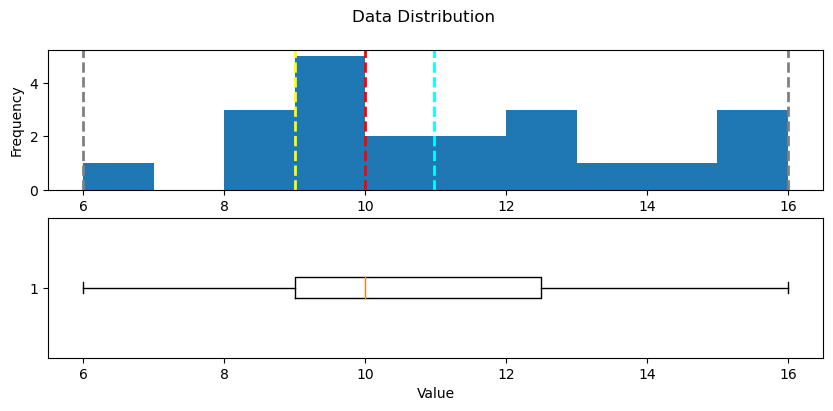

In [108]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\2635274478.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


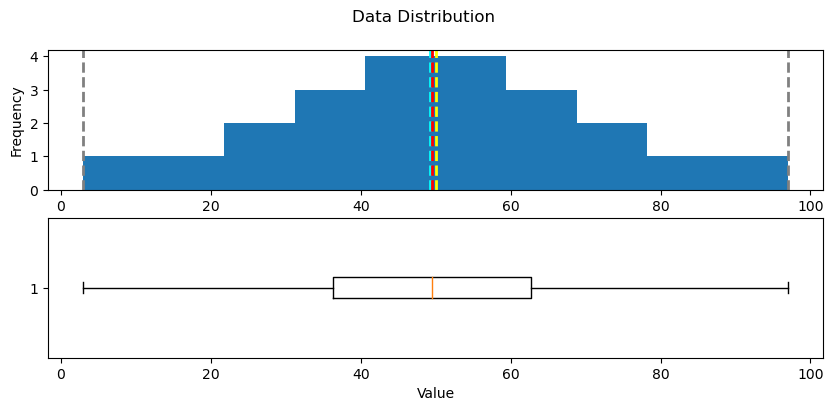

In [109]:
col=df_students.Grade
show_distribution(col)

When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas **quantile** function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Hp\AppData\Local\Temp\ipykernel_17688\2635274478.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


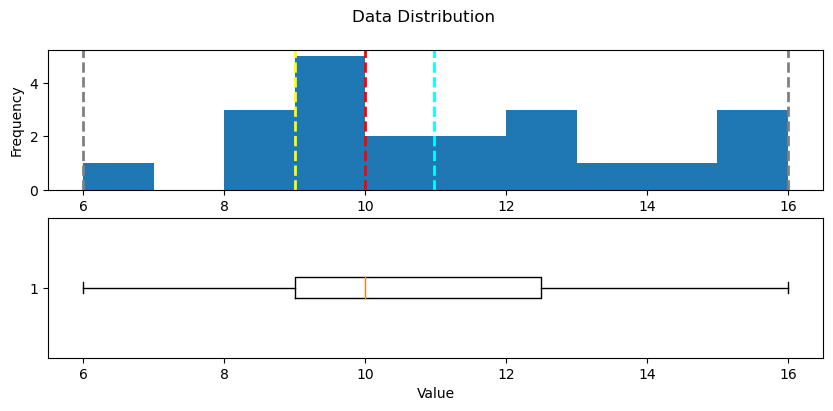

In [110]:
q01=df_students.StudyHours.quantile(0.01)
col=df_students[df_students.StudyHours>q01]['StudyHours']
show_distribution(col)

With the outliers removed, the box plot shows all data within the four quartiles. Note that the distribution is not symmetric like it is for the grade data. There are some students with very high study times of around 16 hours, but the bulk of the data is between 7 and 13 hours. The few extremely high values pull the mean towards the higher end of the scale.

Let's look at the density for this distribution.

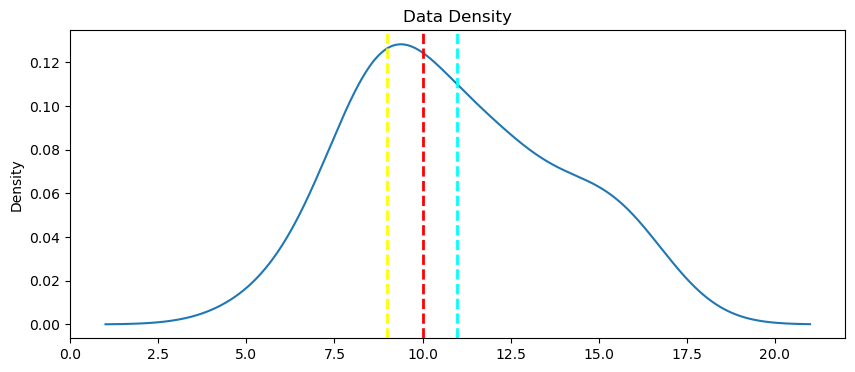

In [112]:
    def show_density(var_data):
        fig = plt.figure(figsize=(10,4))
        var_data.plot.density()
        plt.title('Data Density')
        plt.axvline(x=var_data.mean(),color='cyan',linestyle='dashed',linewidth=2)
        plt.axvline(x=var_data.median(),color='red',linestyle='dashed',linewidth=2)
        plt.axvline(x=var_data.mode()[0],color='yellow',linestyle='dashed',linewidth=2)
        
        plt.show()
    show_density(col)

This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

# Measure of variance

Typical statistics that measure variability in the data include:

Range: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.
Variance: The average of the squared difference from the mean. You can use the built-in var function to find this.                    
Standard Deviation: The square root of the variance. You can use the built-in std function to find this.

In [115]:
    for col_name in ['StudyHours','Grade']:
        col=df_students[col_name]
        rang=col.max()-col.min()
        var=col.var()
        std=col.std()
        print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rang, var, std))


StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49

Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74


Of these statistics, the standard deviation is generally the most useful. It provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean; in other words, the data is more spread out.

When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight. Run the following cell to see the relationship between standard deviations and the data in the normal distribution.

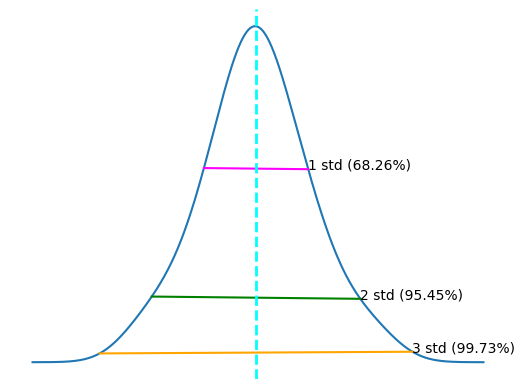

In [119]:
import scipy.stats as stats

col=df_students['Grade']

density=stats.gaussian_kde(col)

col.plot.density()

s=col.std()
m=col.mean()

#Annotate 1st std deviation
x1=[m-s,m+s]
y1=density(x1)
plt.plot(x1,y1,color='magenta')
plt.annotate('1 std (68.26%)',(x1[1],y1[1]))

#Annotate 2nd std deviation
x2=[m-(s*2),m+(s*2)]
y2=density(x2)
plt.plot(x2,y2,color='green')
plt.annotate('2 std (95.45%)',(x2[1],y2[1]))

#Annotate 3rd std deviation
x3=[m-(s*3),m+(s*3)]
y3=density(x3)
plt.plot(x3,y3,color='orange')
plt.annotate('3 std (99.73%)',(x3[1],y3[1]))

plt.axvline(col.mean(),color='cyan',linestyle='dashed',linewidth=2)

plt.axis('off')
plt.show()

The horizontal lines show the percentage of data within one, two, and three standard deviations of the mean (plus or minus).

In any normal distribution:

Approximately 68.26% of values fall within one standard deviation from the mean.
Approximately 95.45% of values fall within two standard deviations from the mean.
Approximately 99.73% of values fall within three standard deviations from the mean.
So, because we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal, we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

The descriptive statistics we've used to understand the distribution of the student data variables are the basis of statistical analysis. Because they're such an important part of exploring your data, there's a built-in describe method of the DataFrame object that returns the main descriptive statistics for all numeric columns.

In [120]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


# Comparing Data

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [121]:
df_sample = df_students[df_students.StudyHours>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


In [122]:
df_sample.describe()

,StudyHours,Grade
count,21.000000,21.000000
mean,10.976190,51.380952
std,2.831635,19.607336
min,6.000000,15.000000
25%,9.000000,37.000000
50%,10.000000,50.000000
75%,12.500000,63.000000
max,16.000000,97.000000


# Comparing numerical and categorical variables

<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

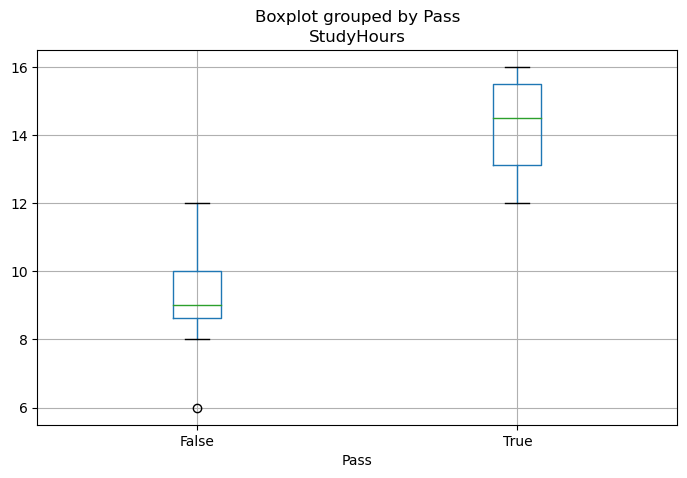

In [126]:
df_sample.boxplot(column='StudyHours',by='Pass',figsize=(8,5))

Comparing the StudyHours distributions, it's immediately apparent (if not particularly surprising) that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive indicator.

# Comparing numerical variables 

Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

<Axes: xlabel='Name'>

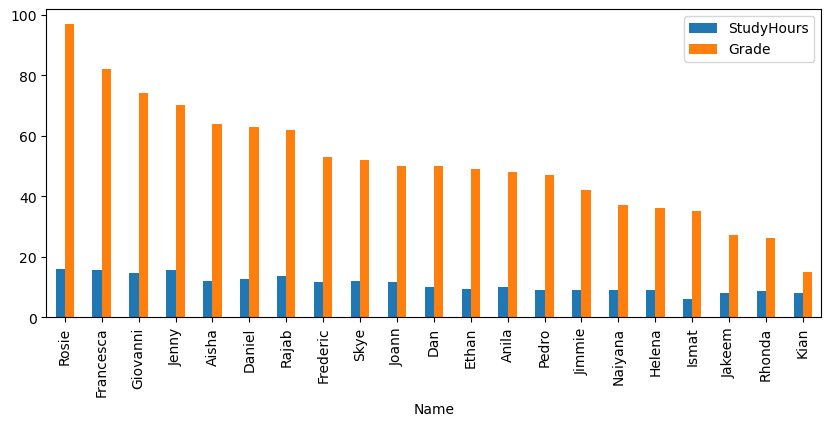

In [128]:
df_sample.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(10,4))

The chart shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. A grade is measured in grade points (and ranges from 3 to 97), and study time is measured in hours (and ranges from 1 to 16).

A common technique when dealing with numeric data in different scales is to *normalize* the data so that the values retain their proportional distribution but are measured on the same scale. To accomplish this, we'll use a technique called *MinMax* scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation, but the **Scikit-Learn** library provides a scaler to do it for you.

<Axes: xlabel='Name'>

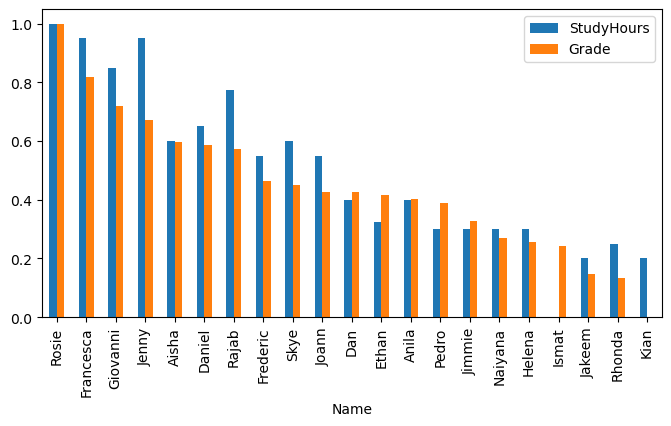

In [131]:
from sklearn.preprocessing import MinMaxScaler
# get a scalar object
scaler=MinMaxScaler()

# create a new dataframe for scaled values
df_normalized=df_sample[['Name','Grade','StudyHours']].copy()

#normalize the numerical columns
df_normalized[['Grade','StudyHours']]= scaler.fit_transform(df_normalized[['Grade','StudyHours']])

df_normalized.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,4))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.

So there seems to be a correlation between study time and grade. In fact, there's a statistical *correlation* measurement we can use to quantify the relationship between these columns.

In [132]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789675

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a *positive* correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a *negative* correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1, showing a strongly positive correlation between study time and grade.

Another way to visualize apparent correlation between 2 numerical columns is scatterplot.

<Axes: title={'center': 'Study Time vs Grades '}, xlabel='StudyHours', ylabel='Grade'>

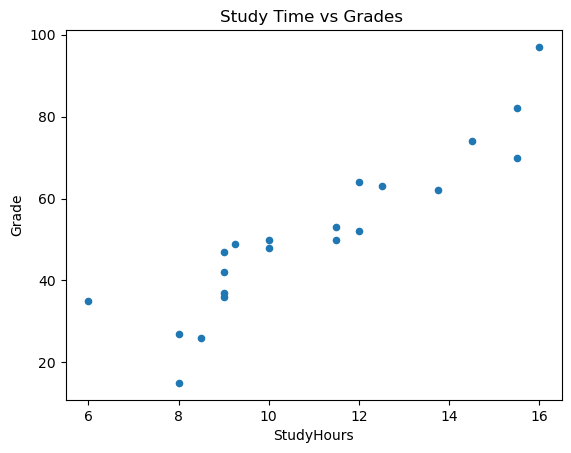

In [133]:
df_sample.plot.scatter(title='Study Time vs Grades ',x='StudyHours',y='Grade')

It looks like there's a discernible pattern in which the students who studied the most hours are also the students who got the highest grades.

We can see this more clearly by adding a *regression* line (or a *line of best fit*) to the plot that shows the general trend in the data. To do this, we'll use a statistical technique called *least squares regression*.

Remember when you were learning how to solve linear equations in school, and recall that the *slope-intercept* form of a linear equation looks like this: 

$ y = mx + b $

In this equation, *y* and *x* are the coordinate variables, *m* is the slope of the line, and *b* is the y-intercept (where the line goes through the Y-axis).

In the case of our scatter plot for our student data, we already have our values for *x* (*StudyHours*) and *y* (*Grade*), so we just need to calculate the intercept and slope of the straight line that lies closest to those points. Then, we can form a linear equation that calculates a new *y* value on that line for each of our *x* (*StudyHours*) values. To avoid confusion, we'll call this new *y* value *f(x)* (because it's the output from a linear equation ***f***unction based on *x*). The difference between the original *y* (*Grade*) value and the *f(x)* value is the *error* between our regression line and the actual *Grade* achieved by the student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.

Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors, hence the name *least squares regression*.

Fortunately, you don't need to code the regression calculation yourself. The **SciPy** package includes a **stats** class that provides a **linregress** method to do the hard work for you. This returns (among other things) the coefficients you need for the slope equation: slope (*m*) and intercept (*b*) based on a given pair of variable samples you want to compare.

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


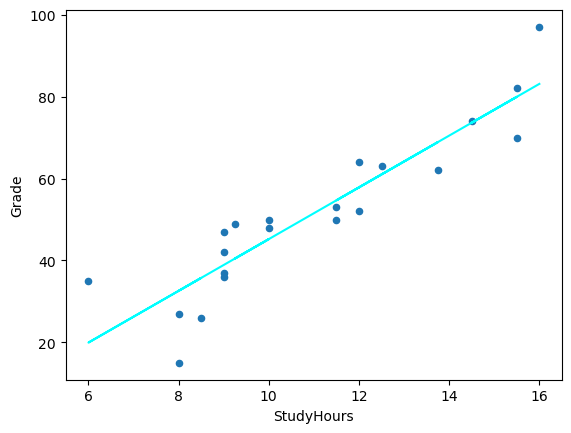

In [136]:
from scipy import stats
df_regression=df_sample[['Grade','StudyHours']].copy()

#get the regression slope and intercept

m,b,r,p,se = stats.linregress(df_regression['StudyHours'],df_regression['Grade'])

print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# use function f(x)= mx+b to calculate f(x) --> grade for each x(studyhours) value

df_regression['fx'] = (m * df_regression['StudyHours']) + b
df_regression['ERROR']= df_regression['fx']-df_regression['Grade']

# create a scatterplot of studyhours vs grade
df_regression.plot.scatter(x='StudyHours',y='Grade')
#plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'],color='cyan')
plt.show()

In [139]:
df_regression[['StudyHours','Grade','fx','ERROR']]
df_regression

,Grade,StudyHours,fx,ERROR
3,97.0,16.00,83.098400,-13.901600
10,82.0,15.50,79.941687,-2.058313
9,74.0,14.50,73.628262,-0.371738
14,70.0,15.50,79.941687,9.941687
21,64.0,12.00,57.844698,-6.155302
20,63.0,12.50,61.001410,-1.998590
11,62.0,13.75,68.893193,6.893193
6,53.0,11.50,54.687985,1.687985
19,52.0,12.00,57.844698,5.844698
1,50.0,11.50,54.687985,4.687985


## Using the regression coefficients for prediction

Now that you have the regression coefficients for the study time and grade relationship, you can use them in a function to estimate the expected grade for a given amount of study.

In [141]:
    def f(x):
        m=6.3134
        b=-17.9164
        return m*x+b
    study_time=14
    
    prediction=f(study_time)
    
    # Grade can't be less than 0 or more than 100
    expected_grade=max(0,min(100,prediction))
    
    #Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


So by applying statistics to sample data, we've determined a relationship between study time and grade and encapsulated that relationship in a general function that can be used to predict a grade for a given amount of study time.

This technique is, in fact, the basic premise of machine learning. You can take a set of sample data that includes one or more *features* (in this case, the number of hours studied) and a known *label* value (in this case, the grade achieved) and use the sample data to derive a function that calculates predicted label values for any given set of features.